# [Career Exploration Kaggle Project](https://www.kaggle.com/t/cf06cb988cbc45969caf84ab4d03affb)


For your final project in Career Exploration, you will be participating in a **Kaggle competition**, a data science and machine learning competition where you use *real* data and develop models to solve *real* problems.

View the competition description / FAQ [here](https://docs.google.com/document/d/1mo0RIUJd1MqOxnaXJHvmWhaO69doDJR9lKfvG-CRYu8/edit?ts=5caadad4) for more info.

**Note**: There is not much guidance provided in this project (on purpose). You'll be doing a lot of going through [previous lectures](https://github.com/SUSA-org/Spring-2019-Career-Exploration) to try to adapt the code provided there to this dataset, and reading documentation that's been linked in most of the problems. We are pushing you, fledgling data scientists, out of the nest and letting you spread your wings and fly.

## About the Competition

Read about it [here](https://www.kaggle.com/c/petfinder-adoption-prediction).

You will be predicting how long it will take for a stray animal (dog or cat) to be adopted based on a variety of characteristics, including categorical data like **breed**, **color**, numerical data like **age**, a **description** of the pet from its rescuer, and an **image** of the pet itself. Note that this is a **classification**, not **regression** task: you will be predicting a pet's **Adoption Speed**, or placing it into one of [five](https://www.kaggle.com/c/petfinder-adoption-prediction/data) categories.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

import os
import seaborn as sns

np.random.seed(42)
% matplotlib inline

### Loading Data

There are **three** different data sources for the competition at your disposal.

#### DataFrame

There are 23 columns of interest, you can read about what each feature means [here](https://www.kaggle.com/c/petfinder-adoption-prediction/data).

In [66]:
train = pd.read_csv('data/train/train.csv')
test = pd.read_csv('data/test/test.csv')

#### Images

The competition provides an image of each pet. Thankfully, so your model does not need to handle images (which are large and hard to deal with), each image has been run through Google's Vision API, and metadata about each image is given.

In [3]:
!head data/train/metadata/86e1089a3-1.json

{
    "labelAnnotations": [
        {
            "mid": "/m/01yrx",
            "description": "cat",
            "score": 0.9907862,
            "topicality": 0.9907862
        },
        {
            "mid": "/m/03dj64",


To use this data, you can load this data into a **dictionary** in Python as follows:

In [4]:
# JSON Loading in Python

pet_image_metadata = json.load(open('data/train/metadata/86e1089a3-1.json'))
pet_image_metadata['labelAnnotations'][0]

{'mid': '/m/01yrx',
 'description': 'cat',
 'score': 0.9907862,
 'topicality': 0.9907862}

#### Descriptions

The rescuer of the pet also provides a description (in the DataFrame).

In [5]:
pet = train.iloc[0]
pet['PetID'], pet['Description']

('86e1089a3',
 "Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.")

Each of these descriptions has also been preprocessed, run through Google's Natural Language API. The analysis of each description is used as follows:

In [6]:
pet_sentiment_metadata = json.load(open('data/train/sentiment/86e1089a3.json'))
pet_sentiment_metadata['sentences'][0]

{'text': {'content': 'Nibble is a 3+ month old ball of cuteness.',
  'beginOffset': -1},
 'sentiment': {'magnitude': 0.8, 'score': 0.8}}

## 1. Exploratory Data Analysis

Provide two plots that demonstrate the correlation between a specific features of the dataset. Here are a two examples:

### Gender vs. Type

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


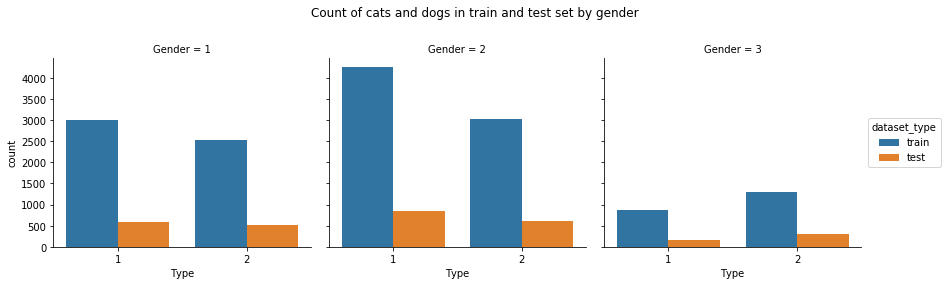

In [7]:
train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
all_data = pd.concat([train, test])


sns.factorplot('Type', col='Gender', data=all_data, kind='count', hue='dataset_type');
plt.subplots_adjust(top=0.8)
plt.suptitle('Count of cats and dogs in train and test set by gender');

### AdoptionSpeed by Type and Fee

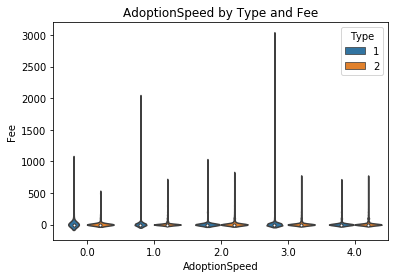

In [8]:
train.drop('dataset_type', inplace=True, axis=1)
test.drop('dataset_type', inplace=True, axis=1)

sns.violinplot(x="AdoptionSpeed", y="Fee", hue="Type", data=all_data);
plt.title('AdoptionSpeed by Type and Fee');

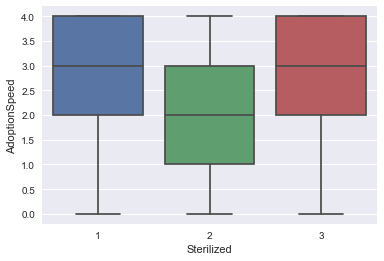

In [48]:
sns.boxplot(x='Sterilized', y='AdoptionSpeed', data=train)

VideoAmt         0.000571
Fee              0.004017
Color3           0.007014
State            0.013119
Dewormed         0.013210
Breed2           0.018642
PhotoAmt         0.023233
Health           0.029382
Color2           0.038579
Color1           0.044192
MaturitySize     0.045653
Gender           0.057622
Vaccinated       0.059043
Quantity         0.062931
Sterilized       0.083447
Type             0.091240
FurLength        0.091337
Age              0.100510
Breed1           0.107834
AdoptionSpeed    1.000000
Name: AdoptionSpeed, dtype: float64

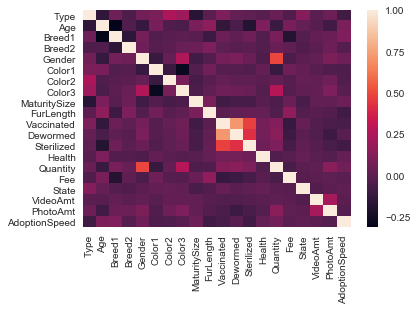

In [65]:
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

col = abs(corr['AdoptionSpeed']).sort_values()
col

## 2. Feature Engineering

Transform your training (and test!) data into two cleaned DataFrames with the features (from the original DataFrame or reading from the images or from the metadata JSON files) you believe will be the most helpful towards creating a model for AdoptionSpeed. 

In order to use the models below, you will need to make every feature **numerical**, not categorical.

Note that this is probably the **most** important part of the project! People underestimate the power of good features: a linear classifier with descriptive features is often more powerful than a more complex model (XGBoost, for example) with bad features. And, since everyone will be using the same models for this competition (aside from tuning the hyperparameters), this step will most likely determine your leaderboard score!

DataHub is a little restrictive in terms of memory space, so feel free to spin up a [Jupyter Notebook locally](https://jupyter.readthedocs.io/en/latest/install.html) to get around this! This is definitely not required, but it could help you do well in the competition, especially in this step! Please ask us for help with this if you have trouble.

In [ ]:
animals_transformed = ... # DataFrame with numerical data where each row is each training point
animals_labels = ... # AdoptionSpeed of each training point in the order in animals_transformed (Series object)

animals_test_transformed = ... # DataFrame with the same features as animals_transformed but each row is each test point
# IMPORTANT: make sure this has the same number of features (columns) as animals_transformed!

animals_test_index = ... # the PetIDs associated with the test points in the same order as the rows in animals_test_transformed
# IMPORTANT: make sure these are the PetIDs IN THE CORRECT ORDER associated with the test points. 
# PetID is how we check if your prediction is correct, so if this is wrong, you will get bad scores on the leaderboard.

In [ ]:
animals_transformed.head() # Sanity check to see if your data is formatted nicely

Run the cells below to test if your DataFrames are formatted correctly

In [ ]:
# test rows are the same
assert animals_test_transformed.shape[0] == test.shape[0]

# number of train columns is same as number of test columns
assert animals_transformed.shape[1] == animals_test_transformed.shape[1]

In [ ]:
# tests if the columns are numeric

from pandas.api.types import is_numeric_dtype

for column in animals_transformed.columns:
    assert is_numeric_dtype(animals_transformed[column])

## 3. Model

This competition uses the **Quadratic Weighted Kappa (QWK)**, or Cohen's kappa for evaluating a model. Read about it [here](https://en.wikipedia.org/wiki/Cohen%27s_kappa#Weighted_kappa). 

We will use a few different models to try to optimize for this metric. 

In [ ]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

### 3.0 Validation Set

Make an 80-20 split of the training data to create the validation set. Use [sklearn.model_seletion.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = ...

### 3.1 Linear Regression

#### 3.1.1 Model

Use linear regression to classify the points in the validation set (don't expect an amazing score). 

Note: linear regression will give you a **continuous** prediction—it won't fit into the 0, 1, 2, 3, 4 categories. You need to find some way to map the output of the predicted values to the correct classes.

In [ ]:
from sklearn.linear_model import LinearRegression

# YOUR CODE HERE

#### 3.1.2 Model Evaluation

Calculate the QWK for these predictions on the validation set. We have already imported it for you.

In [ ]:
# YOUR CODE HERE

Visualize the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for your predictions. Use [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) (already imported) to compute it, and use [sns.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to visualize. What do each of cells mean?

In [ ]:
# YOUR CODE HERE

### 3.2 KNN

#### 3.2.1 Model

Fit a [k-nearest-neighbors classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) to the training data with **k = 3**. Report the QWK for the predictions on the validation set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

#### 3.2.2. Hyperparameter Tuning

Perform [3-fold cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) on the parameter **k**. Find the best parameter of **k = [1, 10, 20]** and report the **QWK** on the validation set if you use this parameter.

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

ks = [1, 10, 20]

cv_scores = np.zeros(len(ks))

for ki, k in enumerate(ks):
    print('Training k =', k, end='\r')
    scores = np.zeros(3)
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        # YOUR CODE HERE
    cv_scores[ki] = scores.mean()

In [ ]:
best_k = ks[cv_scores.argmax()]
best_k

In [ ]:
# Fit the classifier with this parameter

### 3.3. Decision Trees and Random Forest

Fit a [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to the training data. Report the QWK for the predictions on the validation set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

You'll notice that your score is pretty low (maybe even close to your score using Linear Regression). To investigate why, calculate the **QWK** when your classifier predicts the training data.

In [ ]:
# YOUR CODE HERE

This number is very **high** (why do you think that is the case?). Fit another Decision Tree and tune the **max_depth** parameter (using cross-validation or just by trying numbers). Report your best **QWK** on the validation set.

In [ ]:
# YOUR CODE HERE

Now, fit a [Random Forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to your data and report your best **QWK** on the validation set.

In [ ]:
# YOUR CODE HERE

### 3.4 Neural Networks

Train a neural network on the data. Report your QWK on the validation set.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

In [ ]:
# YOUR CODE HERE: add some layers to your neural network

### 3.5 XGBoost

Now that we've tried many different types of classifiers, it's time to bring out the big guns.

Below are hyperparameters for an XGBoost model: tinker around with these (or use cross-validation) to achieve the best validation score (below). Learn about what some of the hyperparameters mean [here](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.train).

In [ ]:
params = {
    'n_splits': ...,
    'verbose_eval': ...,
    'num_boost_rounds': ...,
    'early_stop': ...
}

In [ ]:
from model import train_and_test

In [ ]:
xgb_preds, model, qwk = train_and_test(params, animals_transformed, animals_labels, animals_test_transformed, verbose=True)
print('Validation QWK:', qwk)

## 4. Submitting to Kaggle

Run the cells below, and then download the **submission.csv** file that is created by selecting the checkbox next to the file name and hitting the 'Download' button (IMPORTANT: do not hit the button that looks like a download button, it will download your entire DataHub files). Upload this file [here](https://www.kaggle.com/c/susa-cx-spring-19/submit).

In [ ]:
preds = pd.DataFrame({
    'PetID': animals_test_index,
    'AdoptionSpeed': xgb_preds # or choose another classifier's predictions, if you'd like
}).set_index('PetID')


In [ ]:
preds.to_csv('submission.csv')

Before try to submit to the competition, run the cell below to look at the first few lines of your submission file as a sanity check.

In [ ]:
!head submission.csv